<a href="https://colab.research.google.com/github/AiNguyen237/ISLR_lab_using_Python/blob/main/Linear_Regression/Linear_Regression_Lab_Session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

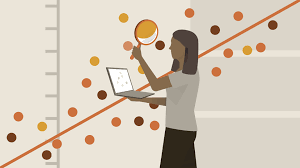

**This lab is based on the lab from ISLR book**

This lab will use statsmodel.

In [1]:
#@title IMPORT LIBRARIES 
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
plt.style.use('seaborn')
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import PolynomialFeatures

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# SIMPLE LINEAR REGRESSION

Download the datasets first 

In [2]:
boston = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Boston.csv')

We will seek to predict ``medv`` using 13 predictors:
1. ``rm`` : average number of rooms per house
2. ``age``: average age of houses 
3. ``lstat``: percent of households with low socioeconomic status

In [3]:
# Find out more about our datasets and the other predictors
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# Define X, y 
X = sm.add_constant(boston['lstat'])
y = boston['medv']

Start by fitting the simple linear regression model with ``medv`` as the response and ``lstat`` as the predictor. 

In [6]:
lr = sm.OLS(y, X)
results = lr.fit()

Get the statistic summary for the model (p-values, standard errors for the coefficients, R2 statistics and F-statistic for the model)


In [7]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           5.08e-88
Time:                        03:14:35   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [8]:
print('Parameters: ', results.params)
print('Standard error: ', results.bse)

Parameters:  const    34.553841
lstat    -0.950049
dtype: float64
Standard error:  const    0.562627
lstat    0.038733
dtype: float64


In [9]:
# Getting the confidence and prediction interval for the prediction of medv for a given value of lstat
predictions = results.get_prediction([X.iloc[5], X.iloc[10], X.iloc[15]])
predictions.summary_frame(alpha=0.5)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.604084,0.399336,29.334541,29.873626,25.399940,33.808228
1,15.125332,0.409341,14.849036,15.401627,10.920749,19.329914
2,26.506923,0.320323,26.290712,26.723134,22.305861,30.707985


With a ```lstat``` at index 10, the 95% confidence interval is (14.849, 15.402) and  the 95% prediction interval is (10.921, 19.330). As expected, the confidence and prediction intervals are centered around the same point (a predicted value of 15.125 for ``medv`` when ``lstat``  is at index 10), but the later is substantially wider. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


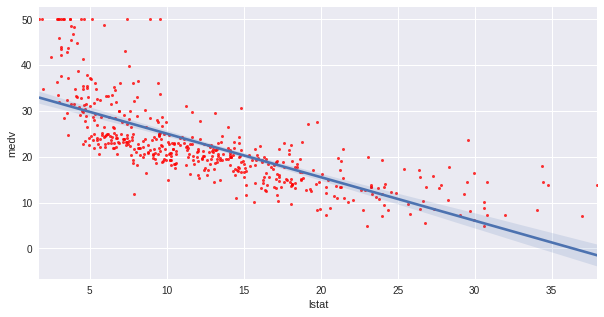

In [10]:
# Plotting out medv and lstat with the least square regression line
plt.figure(figsize=(10,5))
sns.regplot(X.lstat,y, scatter_kws={'color':'r', 's': 9})
plt.show()

seaborn.regplot is used to plot data and a linear regression model fit

More information: https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot

There is some evidence for non-linearity in the relationship between ``lstat`` and ``medv``.

Next, examine some diagnostic plots. 

There are typically four plots:

1. Residuals vs. Fit: A strong pattern in the residuals indicates non-linearity in the data.
2. Normal Q-Q: checking to see if the errors are normally distributed with mean zero. A **good, normal** Q-Q plots have all the residuals lying on or close to the red line. 
3. Scale-Location: checking for heterodasticity. The more horizontal the more homoscedastic.
4. Residuals vs. Leverage: Looking for leverage points (have extreme X values).

For the first plot, we'll be using ``sns.residplot``: https://seaborn.pydata.org/generated/seaborn.residplot.html

For the second, we'll be using ``statsmodels.graphics.gofplots.ProbPlot`` to create a QQplot: https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.ProbPlot.html

For the final plot, calculate the leverages points by calculating the hat matrix diagonal and to get the top 3 calculate the Cook's distance. 

In [11]:
def diagnostic_plots(results):

  """
  Function used to plot the diagnostic plots 
  """

  # Get the predicted values for the original design 
  fitted_values = results.fittedvalues

  # Get the residuals of the model 
  residuals = results.resid

  # Get the studentized standardized residuals 
  standardized_residuals = results.get_influence().resid_studentized_internal

  # Get the abs square root studentized standardized residuals 
  sqrt_standardized_residuals = np.sqrt(np.abs(standardized_residuals))

  # Get model leverage
  leverage = results.get_influence().hat_matrix_diag

  # Get cook's distance to calculate the leverage points
  cook_dist = results.get_influence().cooks_distance[0]

  plt.figure(figsize=(20,5))
  # Create the Residuals vs. Fit plot 
  plt.subplot(141)
  sns.residplot(x = fitted_values, y = residuals, 
                lowess = True, 
                scatter_kws = {'alpha':0.5},
                line_kws = {'color':'red', 'lw':2, 'alpha': 0.8})

  plt.xlabel('Fitted values')
  plt.ylabel('Residuals')
  plt.title('Residuals vs. Fitted')

  # Create the QQ-plot
  plt.subplot(142)
  stats.probplot(standardized_residuals, plot = plt)
  plt.ylabel('Standardized residuals')
  plt.title('Normal Q-Q')

  # Create Scale-Location plot 
  plt.subplot(143)
  sns.regplot(x = fitted_values, y = sqrt_standardized_residuals,
              lowess = True, 
              line_kws = {'color':'red', 'lw':2, 'alpha': 0.8},
              scatter_kws = {'alpha':0.5})
  plt.xlabel('Fitted values')
  plt.ylabel('Square root standardized residuals')
  plt.title('Scale Location plot')

  # Create the Residuals vs. Leverage
  plt.subplot(144)
  sns.regplot(x = leverage, y = standardized_residuals,
              lowess = True,
              line_kws = {'color':'red', 'lw':2, 'alpha': 0.8},
              scatter_kws = {'alpha':0.5})
  plt.xlabel('Leverages')
  plt.ylabel('Standardized residuals')
  plt.title('Residuals vs. Leverage')

  # Annotate the 3 leverage points
  leverage_top_3 = np.flip(np.argsort(cook_dist), 0)[:3]
  for i in leverage_top_3:
    plt.annotate(i, xy = (leverage[i], standardized_residuals[i]))

  plt.show()


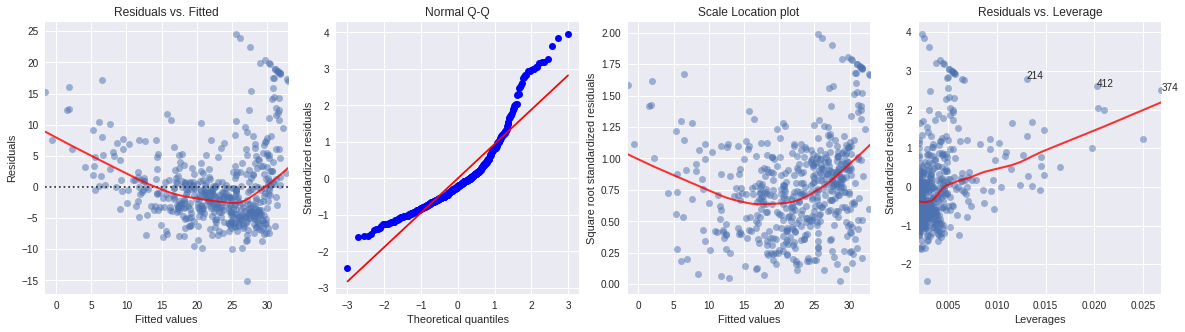

In [12]:
diagnostic_plots(results)

How to interpret the diagnostic plots?
1. The residuals and fitted plot with a clear pattern indicating some of non-linear features of the model, meaning we are underfitting the model.
2. Based on the normal Q-Q plot, the errors are not **normally distributed** and may be suffered from the 'heavy tails'.
3. Our model is suffering from heterodasticity because of the typical sideways "V" shape observed in the scater-location plot.
4. The Residuals vs. Leverages help identifying the observations that have the largest leverage statistics.

# MULTIPLE LINEAR REGRESSION

In [13]:
# Define the new X with two predictors now 
X = boston[['lstat','age']]
X = sm.add_constant(X)

In [14]:
# Fitting the new Linear Regression model
lr_2 = sm.OLS(y, X)
results_2 = lr_2.fit()

In [15]:
# Printing the summary of the new model 
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           2.98e-88
Time:                        03:14:36   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.0

The Boston dataset contains 13 variables. Let's fit all the predictors to the Linear Regression model.

In [16]:
# Define the new X with all 13 predictors 
X = boston.drop('medv', axis = 1)
X = sm.add_constant(X)

In [17]:
lr_3 = sm.OLS(y, X)
results_3 = lr_3.fit()

In [18]:
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 27 Jun 2021   Prob (F-statistic):          6.72e-135
Time:                        03:14:36   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

There is a strong multicollinearity in the dataset indicating by the high condition number. Let's calculate the VIF for each variable to assess the multicollinearity.

In [19]:
# Making the VIF table for each the predictors
vif_data = pd.DataFrame()
vif_data['features_name'] = X.columns

vif_data['VIF_score'] = [vif(X.values, i) for i in range(len(X.columns))]

print(vif_data)

   features_name   VIF_score
0          const  585.265238
1           crim    1.792192
2             zn    2.298758
3          indus    3.991596
4           chas    1.073995
5            nox    4.393720
6             rm    1.933744
7            age    3.100826
8            dis    3.955945
9            rad    7.484496
10           tax    9.008554
11       ptratio    1.799084
12         black    1.348521
13         lstat    2.941491


There resulting VIF for predictor ``tax`` is 9 and ``rad`` is 7 which is more than our cut-off value 5. There is indeed a collinearity when regress of ``medv`` on all the predictors. 

Aside from the VIF score, the p-values for ``age`` and ``indus`` is quite high, 0.9 and 0.7, respectively.

Drop one of the problematic variables, start with ``age``.

In [20]:
X_noage = boston.drop(['age','medv'], axis = 1)
X_noage = sm.add_constant(X_noage)

In [21]:
lr_4 = sm.OLS(y, X_noage)
results_4 = lr_4.fit()

In [22]:
print(results_4.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Sun, 27 Jun 2021   Prob (F-statistic):          6.08e-136
Time:                        03:14:36   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4369      5.080      7.172      0.0

## Interaction terms

Adding interaction terms in a linear model.

In [23]:
# Use statsmodels formula to add interaction terms 
lr_5 = smf.ols(formula='medv ~ lstat*age', data=boston)
results_5 = lr_5.fit()
print(results_5.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           4.86e-88
Time:                        03:14:37   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

## Non-linear Transformations of the Predictors 

In [24]:
# Will be using stats formula api instead. This will allow using the R code in statsmodel, also without this we cannot calculate the annova score
model = 'medv~lstat+I(lstat**2)'
lr_6 = smf.ols(formula = model, data = boston)
results_6 = lr_6.fit()
print(results_6.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sun, 27 Jun 2021   Prob (F-statistic):          1.56e-112
Time:                        03:14:37   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

Using ``I(lstat**2)`` will create a problem: it will be highly correlated with lstat. ``poly()`` creates a curved set of variables where the linear term is not so highly correlated with ``lstat`` and where the curvature is roughly the same across the range of data

The near-zero p-value associated with the quadratic term suggests that it leads to an improved model. 

Use the ``anova()`` function to further quantify the extent to which the quadratic is superior to the linear fit.

In [25]:
table = sm.stats.anova_lm(results, results_6)
print(table)

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


``results`` represents the linear submodel containing only one predictor ``lstat``, ``results_6`` represents the larger quadratic model that has two predictors, ``lstat`` and ``lstat^2``.

**More on Anova test**

1. Null Hypothesis: the two models fit the data equally well.
2. Alternative Hypothesis: the full model is superior.

The F-statistic is 135 and the p-value is close to 0 which means there is very clear evidence that the model containing both the ``lstat`` and ``lstat^2`` is better than the linear one (Reject the Null Hypothesis).

This is not unexpected since when we plot the Residuals vs. Fit that shows there are evidence for non-linearity in the relationship between ``medv`` and ``lstat``.

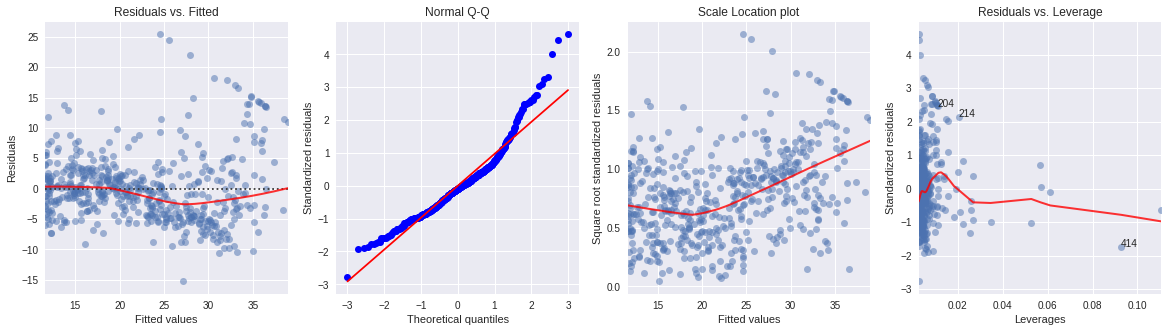

In [26]:
# Plot the diagnostic plot for the new model 
diagnostic_plots(results_6)

Based on the ``Residuals vs. Fitted`` plot above, there are little discernible pattern in the residuals comparing to the previous plot.

Create a higher order of polynomial fit. 

In [27]:
# Replicating the results of R's poly(x,p) function by performing QR decomposition 
def poly(x, p):
  """
  Performing QR decomposition in order to getting Polynomial Features based on p degree

  Input: 
  1. x features 
  2. p degree

  Output:
  """
  x = np.array(x)
  # Using np.vstack() to stack all the rows of different degree of on top of each other 
  # Then use np.transpose to transpose all the rows into columns 
  x = np.transpose(np.vstack((x**k for k in range(p+1))))
  x = np.linalg.qr(x)[0][:,1:]
  return x

In [28]:
lr_7 = smf.ols(formula='medv ~ poly(lstat,5)', data = boston)
results_7 = lr_7.fit()
print(results_7.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Sun, 27 Jun 2021   Prob (F-statistic):          8.73e-122
Time:                        03:14:38   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.5328      0.23

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  from ipykernel import kernelapp as app


This suggests that including additional polynomial terms, up to fifth order, leads to an improvement in the model fit.

We can also try to use a log transformation.

In [35]:
lr_8 = smf.ols(formula='medv ~ np.log(rm)', data=boston)
results_8 = lr_8.fit()
print(results_8.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           1.22e-64
Time:                        03:55:48   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.0

# QUALITATIVE PREDICTORS

We'll be using ``Carseats`` data for this part of the lab.

In [53]:
carseats = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Carseats.csv')

In [54]:
carseats.drop('Unnamed: 0', axis = 1, inplace=True)

We will attempt to predict ``Sales`` (child car seat sales) in 400 locations based on a number of predictors.

In [55]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [56]:
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


The ``Carseats`` data includes qualitative predictors such as ``ShelveLoc``, an indicator of the quality of the shelving location - that is, the space within the store in which the car seat is displayed - at each location. 

In [57]:
carseats.ShelveLoc.unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

``ShelveLoc`` takes on three possible values (Bad, Medium, and Good). 

Create dummy variables for this predictors and fit a multiple regression model that includes some interaction terms.

In [58]:
# Create dummy variables for ShelveLoc
carseats = pd.get_dummies(carseats, columns = ['ShelveLoc'], drop_first=True) # drop_first = True will drop the first column to get k-1 categorical levels 

In [59]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,Yes,Yes,0,0
1,11.22,111,48,16,260,83,65,10,Yes,Yes,1,0
2,10.06,113,35,10,269,80,59,12,Yes,Yes,0,1
3,7.40,117,100,4,466,97,55,14,Yes,Yes,0,1
4,4.15,141,64,3,340,128,38,13,Yes,No,0,0


``pd.get_dummies`` created a ``ShelveLoc_Good`` dummy variable that takes on a value of 1 if the shelving location is good, and 0 otherwise. It has also created a ``ShelveLoc_Medium`` dummy variable that equals 1 if the shelving location is medium, and 0 otherwise. A bad shelving location corresponds to a 0 for each of the two dummy variables.

In [60]:
# We will do the same for both Urban and US
carseats = pd.get_dummies(carseats, columns = ['Urban', 'US'], drop_first=True) # Can merge with the earlier get_dummies
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0


In [63]:
X_9 = carseats.drop('Sales', axis = 1)

In [64]:
y = carseats['Sales']

In [67]:
X_9['Income:Advertising'] = X_9['Income']*X_9['Advertising']
X_9['Price:Age'] = X_9['Price']*X_9['Age']
X_9 = sm.add_constant(X_9)

In [68]:
lr_9 = sm.OLS(y, X_9)
results_9 = lr_9.fit()
print(results_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Sun, 27 Jun 2021   Prob (F-statistic):          6.14e-166
Time:                        04:58:42   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.5756      1

The fact that the coefficient for ``ShelveLoc_Good`` in the regression output is positive indicates that a good shelving location is associated with high sales (relative to a bad location). And ``ShelveLoc_Medium`` has a smaller positive coefficient, indicating that a medium shelving location leads to higher sales than a bad shelving location but lower sales than a good shelving location.